In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn import svm
from sklearn import linear_model, datasets 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import math
import operator 
from collections import Counter

#### Importing the titanic dataset 

In [2]:
data = pd.read_csv('train.csv',header = None)

## Problem 1 (Logistical Regression Default) 

In [3]:
# Picking the parameters class, gender, age
y = data.ix[0:len(data),1].values 
X = data.iloc[0:len(data), [2,4,5]].values

In [4]:
# Splitting the data set 70, 15, 15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_test,y_test,test_size=0.50, random_state=42)

In [5]:
# Fitting the model and printing out the accuracey and f1 score for the dev set predictions 
model = LogisticRegression()
model.fit(X_train, y_train)
IsDeadOrNah = model.predict(X_dev)
print(accuracy_score(y_dev, IsDeadOrNah))
print(f1_score(y_dev, IsDeadOrNah, average = 'binary'))

0.792307692308
0.732673267327


## Problem 2 (Logistical Regression Tweaked) 

In [6]:
# Picking the parameters class, gender, age
y = data.ix[0:len(data),1].values 
X = data.iloc[0:len(data), [2,4,5]].values

In [7]:
# Splitting the data set 70, 15, 15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_test,y_test,test_size=0.50, random_state=42)

In [8]:
# Fitting the model and printing out the accuracey and f1 score for the dev set predictions
model = LogisticRegression(penalty = 'l1', class_weight = 'balanced')
model.fit(X_train, y_train)
IsDeadOrNah = model.predict(X_dev)
print(accuracy_score(y_dev, IsDeadOrNah))
print(f1_score(y_dev, IsDeadOrNah, average = 'binary'))

0.761538461538
0.730434782609


## Problem 3 (KNN) 

In [9]:
# Picking the parameters class, gender, age
y = data.ix[0:len(data),1].values 
X = data.iloc[0:len(data), [2,4,5,1]].values

In [10]:
# Splitting the data set 70, 15, 15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_test,y_test,test_size=0.50, random_state=42)

In [11]:

def Distance(point1, point2, length):
    distance = 0
    for x in range(length):
        distance += math.sqrt(pow(point1[x] - point2[x],2))
        
    return distance

In [12]:

def KNN(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = Distance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [13]:
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [14]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) 


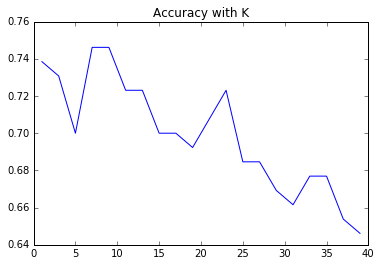

In [15]:
kResult =[]
   
for n in range(1, 40,2):
    correct=0
    predictions=[]
    for x in range(len(X_dev)):
        neighbors = KNN(X_train, X_dev[x], n)
        result = getResponse(neighbors)
        predictions.append(result)
    for x in range(len(X_dev)):
        if X_dev[x][-1] == predictions[x]:
            correct += 1
    acc = (correct/float(len(X_dev)))
    kResult.append([n,acc])

kResult = pd.DataFrame(kResult, columns=["n", "acc"])
plt.plot(kResult.n, kResult.acc)
plt.title("Accuracy with K")
plt.show()
